In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [22]:
p18 = pd.read_csv('players_18.csv', encoding='latin-1') #players_18.csv file, some of the cases we encoded in latin1
p19 = pd.read_csv('players_19.csv', encoding='latin-1') #players_19.csv file, some of the cases we encoded in latin1
m_results = pd.read_csv('match_result.csv', encoding='latin-1') #match_results.csv file, some of the cases we encoded in latin1

In [23]:
p18.shape

(17592, 17)

In [24]:
p19.shape

(17770, 17)

In [25]:
m_results.shape

(2984, 6)

In [26]:
#dropping unneeded variables from the player_18 and player_19 csv files first

#list of variables of interest (voi) that we want to keep for our models
voi_player = ['short_name', 'age', 'height_cm', 'weight_kg', 'club', 'wage_eur',
      'pace' ,'shooting', 'passing', 'dribbling', 'defending',
      'gk_handling', 'gk_speed', 'gk_kicking', 'gk_diving', 'gk_positioning']

columns_list_18 = p18.columns.values.tolist() #list of all columns
columns_list_19 = p19.columns.values.tolist()

for i in range(len(columns_list_18)): #iterate through list of columns
    if columns_list_18[i] not in voi_player: #if column is not in our variables of interest list
        p18.pop(columns_list_18[i]) #remove it from the df
        
for i in range(len(columns_list_19)):
    if columns_list_19[i] not in voi_player:
        p19.pop(columns_list_19[i])

In [27]:
p18['short_name'] = p18['short_name'].astype('category') #setting to correct variable types
p18['club'] = p18['club'].astype('category') #setting to correct variable types
p19['short_name'] = p19['short_name'].astype('category') #setting to correct variable types
p19['club'] = p19['club'].astype('category') #setting to correct variable types

In [28]:
p18.shape #confirming we cut out the 87 unneeded columns

(17592, 16)

In [29]:
p19.shape #confirming we cut out the 87 unneeded columns

(17770, 16)

In [30]:
#dropping unneeded variables from the match_results csv

#list of variables of interest (voi) that we want to keep for our models
voi_match = ['FTHG', 'FTAG', 'FTR', 'HomeTeam', 'AwayTeam']

columns_list_match = m_results.columns.values.tolist()

for i in range(len(columns_list_match)): #iterate through list of columns
    if columns_list_match[i] not in voi_match: #if column is not in our variables of interest list
        m_results.pop(columns_list_match[i]) #remove it from the df

In [31]:
m_results.shape

(2984, 5)

In [32]:
m_results.head()

HomeTeam              AwayTeam  FTHG  FTAG FTR
0  Standard de Liège              KAA Gent     3     2   H
1        KV Kortrijk        RSC Anderlecht     1     4   A
2        KV Oostende  Royal Excel Mouscron     2     1   H
3  Sint-Truidense VV     KSV Cercle Brugge     0     0   D
4   SV Zulte-Waregem      Waasland-Beveren     2     2   D

In [33]:
m_results['HomeTeam'] = m_results['HomeTeam'].astype('category') #setting to correct variable types
m_results['AwayTeam'] = m_results['AwayTeam'].astype('category')
m_results['FTR'] = m_results['FTR'].astype('category')
m_results['FTR']= m_results['FTR'].replace(['H','A','D'],[1,2,0])
m_results.head()

HomeTeam              AwayTeam  FTHG  FTAG  FTR
0  Standard de Liège              KAA Gent     3     2    1
1        KV Kortrijk        RSC Anderlecht     1     4    2
2        KV Oostende  Royal Excel Mouscron     2     1    1
3  Sint-Truidense VV     KSV Cercle Brugge     0     0    0
4   SV Zulte-Waregem      Waasland-Beveren     2     2    0

In [34]:
p18_team_mean = p18.groupby('club').mean().sort_values('pace',ascending=False)

HomeStatsMean = p18_team_mean
HomeStatsMean = HomeStatsMean.add_prefix('Home ')
HomeStatsMean = HomeStatsMean.reset_index()
AwayStatsMean = p18_team_mean
AwayStatsMean = AwayStatsMean.add_prefix('Away ')
AwayStatsMean = AwayStatsMean.reset_index()

temp = pd.merge(m_results,HomeStatsMean,'left',left_on='HomeTeam',right_on='club')
mean_table = pd.merge(temp, AwayStatsMean, 'left',left_on='AwayTeam',right_on='club')

mean_table = mean_table.dropna()
mean_table.shape

(2638, 35)

In [42]:
mean_table.describe()

FTHG         FTAG          FTR     Home age  Home height_cm  \
count  2638.000000  2638.000000  2638.000000  2638.000000     2638.000000   
mean      1.579985     1.228582     1.045489    24.797542      182.051817   
std       1.301180     1.189189     0.735508     1.356784        1.353492   
min       0.000000     0.000000     0.000000    21.629630      178.848485   
25%       1.000000     0.000000     1.000000    23.800000      181.100000   
50%       1.000000     1.000000     1.000000    24.709677      181.964286   
75%       2.000000     2.000000     2.000000    25.714286      183.000000   
max       9.000000     8.000000     2.000000    28.392857      185.208333   

       Home weight_kg  Home wage_eur    Home pace  Home shooting  \
count     2638.000000    2638.000000  2638.000000    2638.000000   
mean        75.816679   28154.319763    69.149556      56.439170   
std          1.695190   30742.951703     2.857165       3.896842   
min         70.333333    2833.333333    63.440000      45.080000   
25%         74.629630    9481.481481    67.250000      53.884615   
50%         75.769231   19781.609195    69.071429      56.291667   
75%         76.966667   32696.969697    71.095238      58.782609   
max         80.303030  188833.333333    76.478261      70.142857   

       Home passing  ...    Away pace  Away shooting  Away passing  \
count   2638.000000  ...  2638.000000    2638.000000   2638.000000   
mean      61.905195  ...    69.149556      56.439170     61.905195   
std        4.141801  ...     2.857165       3.896842      4.141801   
min       52.320000  ...    63.440000      45.080000     52.320000   
25%       59.034483  ...    67.250000      53.884615     59.034483   
50%       61.708333  ...    69.071429      56.291667     61.708333   
75%       64.857143  ...    71.095238      58.782609     64.857143   
max       75.380952  ...    76.478261      70.142857     75.380952   

       Away dribbling  Away defending  Away gk_diving  Away gk_handling  \
count     2638.000000     2638.000000     2638.000000       2638.000000   
mean        67.031741       54.328762       70.627932         68.045432   
std          3.842110        3.718911        4.403203          4.434650   
min         57.920000       46.150000       56.500000         58.250000   
25%         63.884615       51.545455       68.333333         65.000000   
50%         67.166667       54.153846       70.750000         67.500000   
75%         69.384615       56.571429       73.500000         71.000000   
max         78.952381       63.739130       82.500000         79.000000   

       Away gk_kicking  Away gk_speed  Away gk_positioning  
count      2638.000000    2638.000000          2638.000000  
mean         64.930730      41.809376            67.930939  
std           4.999296       6.164802             4.681472  
min          53.500000      27.000000            56.750000  
25%          61.750000      37.812500            65.000000  
50%          64.333333      41.500000            68.250000  
75%          68.000000      46.333333            71.500000  
max          79.666667      57.500000            80.000000  

[8 rows x 31 columns]

Text(0.5, 1.0, 'Pace stats of Home Team vs Match Result')

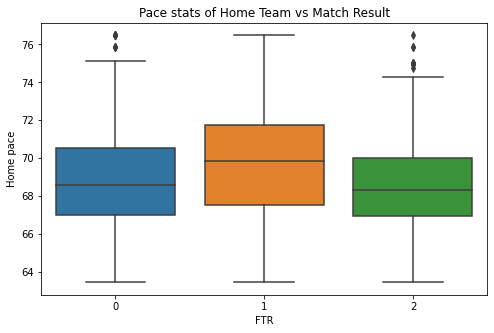

In [44]:
plt.figure(figsize = (8,5))
sns.boxplot(x="FTR", y="Home pace", data=mean_table)
plt.title('Pace stats of Home Team vs Match Result')

Text(0.5, 1.0, 'Dribbling stats of Home Team vs Match Result')

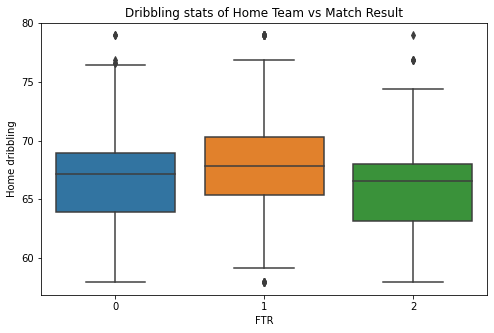

In [46]:
plt.figure(figsize = (8,5))
sns.boxplot(x="FTR", y="Home dribbling", data=mean_table)
plt.title('Dribbling stats of Home Team vs Match Result')

Using Home pace and Home dribbling, we can see that in matches where home teams win (away teams lose), home team pace and dribbling stat tends to be higher. 